<h1><center>Programming for Data Analysis</center></h1>
<h3><center>Autumn/Winter 2021 Project</center></h3>

---

<h1><center>"The Session"</center></h1>

![symbol](images/music-notes.jpeg)

<br>

#### Introduction  

The brief for the project stipulated that we *"create a data set by simulating a real-world phenomenon"*. It was further suggested we pick something that is of interest to us in our personal or professional life. I've decided to do something on music sessions and try to simulate a dataset based on the attendees at sessions in a given month in a particular pub in Cork city! 

I'll pick a selection of relevent variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information. 

![session1](images/session1.jpg "image by Eddie Hennessey taken in the Cornerhouse Pub Cork City")

<br>

---
#### Research
---

The research carried out involved personal observation in the particular establishment, an interview with the *fear an tí*, casual interviews with some of the regular musicians, and general knowledge and experience with the subject matter and scene. The tone of the project is light hearted in nature and merely a vehicle for demonstrating an understanding of how to simulate data.    

<br>

#### The variables

The first challenge was to come up with a list of potential variables that were both appropriate and possible to simulate. The list below changed quite a few times after I discovered problems with some, and thought of others as the project progressed. A field trip helped! 😁

- The players  
There can be anywhere between 3 and sometimes more than 10 musicians on any given night, and this particular pub (pre-covid!) would usually have 7 sessions a week. So that's a monthly range of between 84 and 280+ musicians. The brief asks for *"at least one-hundred data points across at least four different variables"*, so I need to ensure my simulation returns at least that.
3 is always the minimum number of musicians each night, as they would be the paid hosts of the session. The norm would be around 5 or 6 musicians, but sometimes there might be more than 10 for a party or special occasion.

- The instruments  
The range of instruments played includes fiddle, accordion, guitar, flute, uilleann pipes, bodhrán, bouzouki, banjo, concertina, mandolin, bass, and drums. Some of the instruments are particular to a musical genre, while some would be found at all of the different sessions. Within that some instruments are more popular than others, with at least 1 guitar being found at every single session.

- Genre  
While the pub mostly has Irish traditional music (ITM) sessions, there are also nights with bluegrass, old-time, and blues music. The weekly breakdown of sessions is 4 ITM and 1 each of the other three.

- Ability  
All of the musicians would be of differing ability levels. The hosts would normally be the most able. The guests can range from competent amateurs just joining in, to experienced professional musicians passing through town. The pub in question is quite renowned so there would be a lot of highly competent players and very few beginners if any.

- Age  
The pub in question is over 21s only and is regarded as an 'old man's pub'! The total age range would be from 21 up to over 80, which would be equally spread out with possible spikes at either end of the spectrum due to music students from UCC and Cork School of Music, plus a certain old-time string band of aging veterans! Age isn't necessarily connected to ability but can be! Generally the old-time blugrass players tend to be older, while a lot of the ITM players would be younger.

- Paid  
The session would always have at least 3 hosts who would be paid. It's most common for these to be the best ability-wise, and gererally older. The typical instruments for ITM hosts would be accordion, fiddle and guitar. Whereas there may be more of a mix in the other genres, and possibly more musicians sharing the fee.

- Gender  
Men would certainly be in the majority at all sessions here! Blues and bluegrass sessions would nearly be entirely male, while there would be more women in the ITM sessions.

- Repertoire  
It has been suggested that an average ITM musicians knows around 1500 tunes (https://thesession.org/discussions/33314)! That seems a lot to be the average as it suggests some know a lot more! But in the absence of any scientific data I have to take a number from somewhere. Blues musicians would tend to have a smaller repertoire and the nature of the music lends itself to 'jamming' where the musicians may not know the actual song. Bluegrass/old-time musicians would be somewhere in bewtween. Older and better musicians in each genre would tend to have bigger reportoires while younger and less able would have smaller.

- Drink  
Just putting this in for the craic! The typical drinks might be Beamish, Guinness, Murphys, various lagers on tap, craft beers, red wine, spirits, water/soft drinks. The older hosts and musicians tend to drink Beamish and red wine! The younger craft beers and non-alcoholic drinks? Sweeping generalisations will abound here!

<br>

I need to examine each of these variables in more detail and try and work out code to simulate them. I guess one of the ultimate goals in this will be whether myself or one of my colleagues could recognise ourselves in the results!

<br>

___
#### An initial look at datatypes and an attempt to code
---

We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# nicer plotting
import seaborn as sns

# module for choosing from a list
from secrets import choice

# python standard random library
import random

We set a global style and size for the plots

In [2]:
# # set global style for seaborn plots
sns.set_style("darkgrid")

# set global figure size
plt.rcParams["figure.figsize"] = (15,10)

<br>

To begin I'm going to create a simple table populated with quickly generated random data just to get a feel for the size and shape of the potential final outcome, and also to choose appropriate datatypes.

- Musicians  
---

We'll create an array of 100 numbers and use that as the first column to represent 100 musicians.

In [3]:
# create numPy array using 100 as upper limit
data = np.arange(100)

# turn it into a dataframe
proto = pd.DataFrame(data, columns = ['musician'])

- Instruments  
---

We create a list of the potential instruments and use `numpy.random.choice` to choose 100 at random and use those to populate the second column of the dataframe. To use numpy.random we need to first create a new random number generator.

In [4]:
# create a random number generator with seed
rng = np.random.default_rng(12345)

# create a list of instruments
instrs = ['guitar', 'fiddle', 'accordion', 'flute', 'uilleann_pipes', 'concertina', 'bodhrán',
        'mandolin', 'bass', 'banjo', 'drums', 'keyboard']

# choose 100 at random
instrs = rng.choice(instrs, size=100)

# create column with randomly chosen instruments
proto['instrument'] = instrs.tolist()

- Genre  
---

We create a list of potential genres and choose a random selection to be added as the third column

In [5]:
# create list of genres
genres = ['ITM', 'old_time', 'bluegrass', 'blues']

# choose a random 100
genres = rng.choice(genres, size=100)

# create a new column in dataframe
proto['genre'] = genres.tolist()

- Ability  
___

Same as above

In [6]:
ability = ['good', 'really_good']
ability = rng.choice(ability, size=100)
proto['ability'] = ability.tolist()

- Age  
---

Same as above

In [7]:
age = ['young', 'middle-aged', 'older']
age = rng.choice(age, size=100)
proto['age'] = age.tolist()

- Paid  
___

Same as above

In [8]:
paid = ['yes', 'no']
paid = rng.choice(paid, size=100)
proto['paid'] = paid.tolist()

- Gender  
___

Same as above

In [9]:
genders = ['male', 'female']
gender = rng.choice(genders, size=100)
proto['gender'] = gender.tolist()

- Repertoire  
___

I'm going to set 1500 as the `loc` (mean) and create a normally distributed array of 100 values. To get something that looks anyway close to reality I've set the `scale` (standard deviation) to 600.

In [10]:
# create and array of 100 values with a mean of 1500 and SD of 600
repertoire = rng.normal(loc=1500, scale=600, size = 100)

# convert to integers
repertoire = repertoire.astype(int)

# have a look
repertoire

array([1117, 2186,  515,  711, 1193, 1440, 1422,  661, 1616, 1422, 1712,
        850, 1646, 1632, 1103, 1368, 1166, 2313, -371,  631,  476, 1273,
       1092, 1253, 1931,  520,  992, 1366,  778, 1721, 1697, 1073,  437,
       2460, 1782, 1754, 1543, 1495, 1998, 1490, 1121, 1925, 1535, 1036,
        956, 2199, 1878, 2685, 1184, 1053, 1742, 2327, 1858, 1759, 2632,
       1053,  751, 1053, 1309, 1724, 2113, 1743, 2413, 1003, 2643, 1012,
       2202,  937, 1705, 1530, 1810, 1950, 1372, 1459, 1643,  716, 1061,
        525, 1503, 2833, 1944,  980, 1075, 2085, 1215,  534,  886,  867,
        887, 1905, 1542,  606, 1176,  817,  774,  595, 2548, 1315, 1845,
       2021])

In [11]:
# add to dataframe
proto['repertoire'] = repertoire.tolist()

- Drink  
___

Same as above

In [12]:
# create a list of drinks
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'shorts/cocktails', 
          'cider', 'non-alco']
drinks = rng.choice(drinks, size=100)
proto['drink'] = drinks.tolist()

<br>

So let's have a look!

In [13]:
proto.head(10)

,musician,instrument,genre,ability,age,paid,gender,repertoire,drink
0,0,bass,old_time,good,older,yes,female,1117,guinness
1,1,accordion,old_time,good,older,no,male,2186,red_wine
2,2,banjo,bluegrass,good,middle-aged,no,male,515,craft_beers
3,3,flute,ITM,good,older,yes,male,711,craft_beers
4,4,accordion,bluegrass,really_good,middle-aged,yes,male,1193,red_wine
5,5,banjo,bluegrass,really_good,middle-aged,yes,male,1440,red_wine
6,6,mandolin,ITM,good,middle-aged,no,male,1422,cider
7,7,bass,ITM,good,young,yes,female,661,guinness
8,8,keyboard,old_time,good,young,no,male,1616,red_wine
9,9,uilleann_pipes,old_time,really_good,middle-aged,no,male,1422,shorts/cocktails


It looks good! But obviously it's completely random data that has little basis in reality and none of the variables have any relationship with each other. I'll have to look at each of the variables in a lot more detail and find ways of simulating more accurate data.  
We'll save the dataframe to file just to compare later

In [14]:
# save to csv
proto.to_csv('data/the_session_prototype.csv')

<br>

---
#### **The players**  
---

We'll decide that the month is January* so that's 30 days (not including New Year's Day 😁) and 30 sessions. The range for the amount of musicians at any particular session is usually 3-10, but can be more (not less). The datatype would obviously have to be integer. This value could also serve as the index as each attendee (or more correctly attendence as in reality a lot of people will atend on multiple occasions) will be unique.

I'm going to create an array of 30 values between 3 and 10 to represent attendance each night, and then add them up to calculate total attendence for the month. We're using `numpy.random` to create the array of integers.

\* this can be changed by the viewer for a different month or a longer period of time  
\** the viewer can change or remove the seed (above) to give a different result each time

In [15]:
# create an array of 30 numbers between 3 and 11 (non-inclusive)
x = rng.integers(3, 11, 30)
x

array([ 9,  6,  3,  6,  9,  5,  7,  9, 10,  4,  3,  9,  9,  7,  4,  5,  7,
       10,  3, 10,  9, 10,  6,  3,  9,  6,  6, 10,  7,  3])

It's hard to judge anything from that but we can create a `barplot` with `seaborn` to get a better idea.

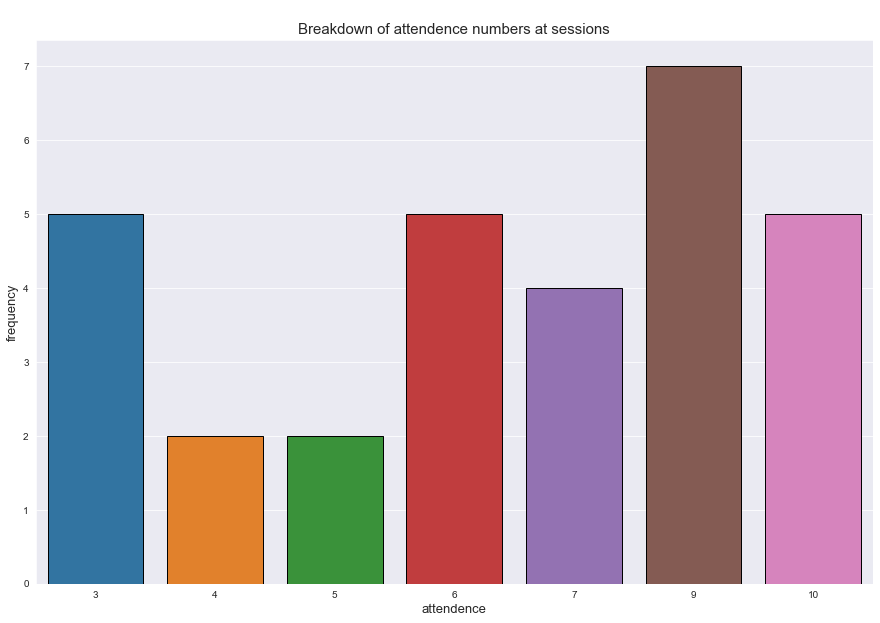

In [16]:
# add up the frequency of each unique value
unique, counts = np.unique(x, return_counts=True)

# set title and labels
plt.title("\nBreakdown of attendence numbers at sessions", size=15)
plt.xlabel("attendence", size=13)
plt.ylabel("frequency", size=13)

# plots the results
sns.barplot(x = unique, y = counts, edgecolor='k');

This doesn't reallty work as I want the average to be around 5/6 and there certainly aren't going to be that many sessions with 9/10 people. There should also be a slight possibility of more than 10 people showing up.  
I need to find a normal distribution with a mean around 5. And with integers! And with no values below 3! The following is adapted from https://www.py4u.net/discuss/18951 and https://stackoverflow.com/questions/55806118/remove-elements-from-numpy-array-smaller-than-1.


The total number of attendances at sessions in January is 146



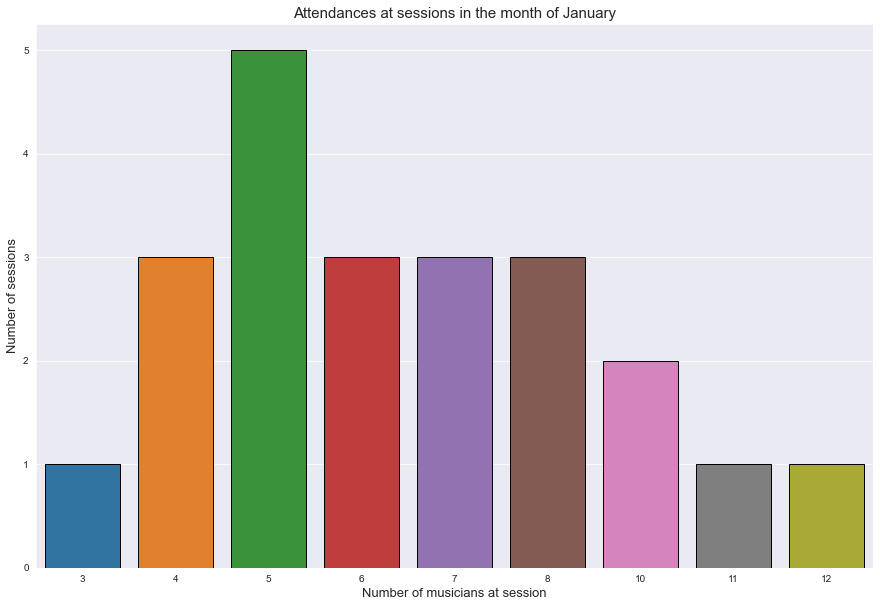

In [17]:
# sets mean, standard deviation and size of array
muso = rng.normal(loc=5, scale=3, size=30)

# rounds the values
musoInt = np.round(muso)

# removes values lower than 3
musoInt1 = musoInt[(musoInt > 2)]

# convert to integers
musoInt1 = musoInt1.astype(int)
# print(musoInt1)

# add up the frequency of each unique value
unique, counts = np.unique(musoInt1, return_counts=True)

# sets title and labels for plot
plt.title("Attendances at sessions in the month of January", fontsize=15)
plt.xlabel("Number of musicians at session", fontsize=13)
plt.ylabel("Number of sessions", fontsize=13)

# plots the results
sns.barplot(x = unique, y = counts.astype(int), edgecolor='k')

# adds up the results and converts to an int
y = int(musoInt1.sum())

print(f'\nThe total number of attendances at sessions in January is {y}\n')

This looks like a lot better representation of what the breakdown of attendences might be. We now need to turn the total into the first column of the dataframe. We create an array using `numpy` with the total as the upper limit. This is then converted into a `pandas` dataframe and the first column titled 'musician'.

In [18]:
# create numPy array using x as upper limit
data = np.arange(y)

# turn it into a dataframe
df = pd.DataFrame(data, columns = ['musician'])

# have a look
df.head()

,musician
0,0
1,1
2,2
3,3
4,4


<br>

---
#### **The instruments**  
---

![uilleann_pipes](images/uilleann_pipes.jpeg "uilleann pipes photo by Paul Eliasberg")

We need to create a list of the instuments first and divide them up by genre:
- ITM - guitar, fiddle, accordion, flute, uilleann pipes, concertina, bodhrán
- Bluegrass - mandolin, bass, banjo, guitar, fiddle, dobro
- Old-time - mandolin, bass, banjo, guitar, fiddle
- Blues - guitar, drums, keyboard, bass  

We can see that is there is quite a bit of crossover in the instruments. Guitar is featured in all of the genres while most of the ITM instruments are specific to that genre. I'm going to put all of the instruments in a list and use `numpy.random.choice` to create another array the same size (`y`) as the first column 'musician'. I ordered the instruments by popularity and weighted the percentage chance of returning each instrument (`p=[0.15, etc]`) accordingly so that guitar will be the most likely instrument to be returned followed by fiddle, etc. It took quite a bit of experimenting to achieve a result that looked realistic.  
This variable doesn't need to be related to anything yet so we can assign the instruments to musicians randomly as a new column. 

In [19]:
# create a list of instruments
instrs = ['guitar', 'fiddle', 'accordion', 'bass', 'banjo', 'mandolin', 'drums', 
          'uilleann_pipes', 'flute', 'concertina', 'bodhrán', 'dobro', 'keyboard']

# we can pass in the probability for each item
instrs = rng.choice(instrs, p=[0.3, 0.25, 0.09, 0.09, 0.07, 0.04, 0.04, 0.03, 0.02, 0.02, 0.02,  
                               0.015, 0.015], size=y)

# adds this list as a column to the dataframe
df['instrument'] = instrs.tolist()

# have a look
df.head()

,musician,instrument
0,0,banjo
1,1,fiddle
2,2,guitar
3,3,bass
4,4,bass


In [20]:
# prints out some info so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   musician    146 non-null    int64 
 1   instrument  146 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


I'm now going to set 'musician' to be the index.

In [21]:
# set index
df.set_index("musician", inplace = True)

# have a look
df.head()

,instrument
musician,
0,banjo
1,fiddle
2,guitar
3,bass
4,bass


We'll just take a look at the breakdown to make sure it looks ok.

In [22]:
df["instrument"].value_counts()

guitar            46
fiddle            32
accordion         25
banjo             14
bass              10
uilleann_pipes     5
mandolin           4
drums              3
dobro              2
keyboard           2
concertina         2
flute              1
Name: instrument, dtype: int64

We can view this information in a pie chart.

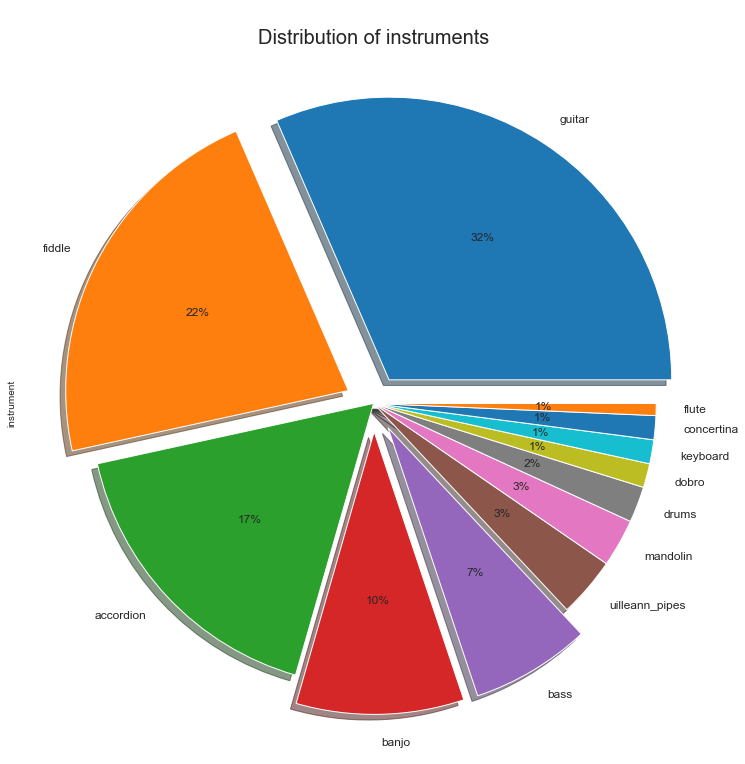

In [23]:
# create a variable for value counts
instr=df["instrument"].value_counts()

# set figure size
plt.rcParams["figure.figsize"] = (18,13)

# set explode (wedges set out from main pie)
myExplode = [0.1, 0.1, 0, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]

# create pie chart with various parameters
ax = instr.plot(kind='pie', autopct='%1.0f%%', shadow=True, explode = myExplode, textprops={'fontsize': 12})

# set title
ax.set_title("\nDistribution of instruments", size=20);

Looks convincing enough!

<br>

---
#### **The genre**  
---

This is where things get a little more interesting! There are 4 main genres represented in the sessions - ITM, bluegrass, old-time American, and blues. The ITM sessions are 4 nights a week while the other genres have 1 night each. Some instruments are played at all sessions (guitar), while some are particular to a genre (accordion and ITM).

After a lot of experimentation I came up with the following solution!  
Matching the genre to instrument for some instruments was easy in that all the accordions and uilleann pipers played in the ITM sessions. The following code sorts that:
```
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
```
The guitar and the fiddle were a bit more tricky in that they played in sessions of different genres.  I first of all saved the count for each instrument that played in multiple genres. I used the `pandas.count` method and converted the result to integer using `astype(int)`

In [24]:
# isolate guitar in 'instrument column'
noGuitars = df[df['instrument']=='guitar']

# count and convert to int
noGuitars = noGuitars.count().astype(int)

noFiddles = df[df['instrument']=='fiddle']
noFiddles = noFiddles.count().astype(int)

noBanjos = df[df['instrument']=='banjo']
noBanjos = noBanjos.count().astype(int)

noMandolins = df[df['instrument']=='mandolin']
noMandolins = noMandolins.count().astype(int)

noBasses = df[df['instrument']=='bass']
noBasses = noBasses.count().astype(int)

I then needed to create variables of lists for each genre based on a particular instrument, i,e, mandolin only plays bluegrass and old-time.

In [25]:
# guitar
genre1 = ['bluegrass', 'ITM', 'old-time', 'blues']

# bass
genre2 = ['bluegrass', 'old-time', 'blues']

# banjo
genre3 = ['bluegrass', 'ITM', 'old-time']

# mandolin
genre4 = ['bluegrass', 'old-time']

# fiddle
genre5 = ['ITM', 'bluegrass', 'old-time']

This is where I spent the most time!!! I used `random.choices` and `pandas.Series` to create arrays for each of the problematic instruments. I weighted the output to reflect what I though was appropriate and I had to specify the length of the array. I couldn't give a simple integer here (as the number will change if the code is run again without a seed), so I had to convert the `noGuitars` variable to an integer. This `pandas` series is then converted to a numpy array ready to be added to the dataframe.

In [26]:
# create a random pandas series for guitar
guitar = pd.Series(random.choices(genre1, weights=[1, 1, 1, 2], k=int(noGuitars)))
# converts to numpy array
guitar1 = guitar.to_numpy()

bass = pd.Series(random.choices(genre2, weights=[1, 1, 1], k=int(noBasses)))
bass1 = bass.to_numpy()

banjo = pd.Series(random.choices(genre3, weights=[2, 1, 2], k=int(noBanjos)))
banjo1 = banjo.to_numpy()

mandolin = pd.Series(random.choices(genre4, weights=[1, 1], k=int(noMandolins)))
mandolin1 = mandolin.to_numpy()

fiddle = pd.Series(random.choices(genre5, weights=[2, 1, 1], k=int(noFiddles)))
fiddle1 = fiddle.to_numpy()

The following code creates a new column entitled 'genre' and specifies what genre each musician plays based on their instrument.

In [27]:
# where instrument equals accordion, genre equals ITM, etc
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'concertina', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'guitar', 'genre'] = guitar1
df.loc[df['instrument'] == 'bass', 'genre'] = bass1  
df.loc[df['instrument'] == 'mandolin', 'genre'] = mandolin1  
df.loc[df['instrument'] == 'banjo', 'genre'] = banjo1
df.loc[df['instrument'] == 'uilleann_pipes', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'flute', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'bodhrán', 'genre'] = 'ITM'
df.loc[df['instrument'] == 'keyboard', 'genre'] = 'blues'
df.loc[df['instrument'] == 'drums', 'genre'] = 'blues'
df.loc[df['instrument'] == 'fiddle', 'genre'] = fiddle1
df.loc[df['instrument'] == 'dobro', 'genre'] = 'bluegrass'

# have a look
df.head(10)

,instrument,genre
musician,,
0,banjo,bluegrass
1,fiddle,old-time
2,guitar,bluegrass
3,bass,old-time
4,bass,bluegrass
5,dobro,bluegrass
6,guitar,blues
7,guitar,bluegrass
8,mandolin,old-time


Seems fine!

<br>

---
#### **Ability**   
---

We're going to go with a binary approach here - intermediate or advanced as in reality there are no beginners at these sessions. Ability isn't dependent on anything else - there are good and bad (less good!) in all genres, and age-groups, and each genre is performed to a similar level.  
We're using a similar method to above with `random.choice` and `pandas.Series`. We're assuming that half of the musicians are 'decent' and the other half are 'legends' so this will be a bit simpler.

In [28]:
# create a list of ramdom choices for decent and legend
ability = pd.Series(random.choices(['decent','legend'], weights=[1, 1], k=len(df)))

In [29]:
# add new column to table
df['ability'] = ability.tolist()

# have a look
df.head(10)

,instrument,genre,ability
musician,,,
0,banjo,bluegrass,legend
1,fiddle,old-time,decent
2,guitar,bluegrass,decent
3,bass,old-time,decent
4,bass,bluegrass,legend
5,dobro,bluegrass,decent
6,guitar,blues,decent
7,guitar,bluegrass,decent
8,mandolin,old-time,decent


<br>

---
#### **Age**  
---

I had thought about actual ages here, but it would be completely random and difficult to produce anything very convincing. So I decided to break it into age brackets - I've given them names but they could equally have been numeric ranges.
We're going to have 3 age-groups - 'whizz kids', 'grown-ups', and 'old-heads'. The breakdown is going to be skewed towards the outer 2 ranges. Data type will be string.

In [30]:
# create the age_group variable
age_group = ['whizz_kid', 'grown-up', 'old-head']

In [31]:
# create new list
age_group = rng.choice(age_group, p=[0.4, 0.2, 0.4], size=y)

In [32]:
# add new column to dataframe
df['age_group'] = age_group.tolist()

# have a look
df.head(10)

,instrument,genre,ability,age_group
musician,,,,
0,banjo,bluegrass,legend,old-head
1,fiddle,old-time,decent,whizz_kid
2,guitar,bluegrass,decent,grown-up
3,bass,old-time,decent,whizz_kid
4,bass,bluegrass,legend,whizz_kid
5,dobro,bluegrass,decent,old-head
6,guitar,blues,decent,whizz_kid
7,guitar,bluegrass,decent,old-head
8,mandolin,old-time,decent,grown-up


<br>

---
#### **Paid**  
---

There are at least 3 musicians getting paid each night, one of whom is always a guitar player. There are 30 sessions, so I need to pick 90 at random to get paid of which 30 need to be guitar players! There are only going to be 30 paid guitar players in total as there wouldn't be two guitarists getting paid on the same night, so I'll extract a random sample of 30 guitar players. For the remaining 60 I'm going to choose the better ability musicians and 'old-heads'. 

First we check how many guitarists we have in total:

In [33]:
# how many guitar players
df[df['instrument']=='guitar'].count()

instrument    46
genre         46
ability       46
age_group     46
dtype: int64

We need to choose 30 of those to get paid. we use `.sample()` method for this and create a new dataframe with the result.

In [34]:
# choose 30 guitarists and save in a new dataframe
df1 = df[df['instrument']=='guitar'].sample(n = 30)

# create new column with paid guitarists
df1['paid'] = 'yes'

We need to choose around 60 non-guitarists to get paid. We have a preference for legends and old-heads.

In [35]:
# create a new dataframe with just the non-guitarists
df2 = df[df['instrument']!='guitar']

# filter to leave only legends and old-heads
df2 = df2[(df2['ability']=='legend') | (df2['age_group']=='old-head')]

# have a look at the overview
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 145
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instrument  66 non-null     object
 1   genre       66 non-null     object
 2   ability     66 non-null     object
 3   age_group   66 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


Looks like we have enough to make this work so we label all of these musicians as 'paid'. It doesn't matter if we have slightly more than 60 as some nights there can be more than 3 people getting paid.

In [36]:
# create a new column with paid and fill with 'yes'
df2['paid'] = 'yes'

We revisit the original dataframe and create a new column 'paid' and fill it with NaN values.

In [37]:
# fill in the paid column with Nan values
df['paid'] = np.nan

We then concatenate the 3 dataframes.

In [38]:
# combine the 3 dataframes
dfNew = pd.concat([df, df1, df2], axis=0)

Sort the order.

In [39]:
# sort the dataframe
df = dfNew.sort_values(by=['musician', 'paid'])

Drop the duplicated rows, keeping the first.

In [40]:
# drop duplicated rows
df = df[~df.index.duplicated(keep='first')]

Then fill in at the remaining `NaN` values with 'no'.

In [41]:
# fill in Nan values with 'no'
df = df.fillna('no')

We have a look at the value counts of paid and non-paid just to check.

In [42]:
# have a look at quantities of paid and non-paid
df['paid'].value_counts()

yes    96
no     50
Name: paid, dtype: int64

All good! And then a look at the newly updated dataframe.

In [43]:
# have a look
df.head()

,instrument,genre,ability,age_group,paid
musician,,,,,
0,banjo,bluegrass,legend,old-head,yes
1,fiddle,old-time,decent,whizz_kid,no
2,guitar,bluegrass,decent,grown-up,yes
3,bass,old-time,decent,whizz_kid,no
4,bass,bluegrass,legend,whizz_kid,yes


All OK!

<br>

---
#### **Gender**  
---

Unfortunately the gender is way off the charts in this place! Maybe 20% women max! I can use the same code as for ability above and just skew it towards men. I'll also include 'other' - according to https://en.wikipedia.org/wiki/Intersex#Population_figures this makes up 0.02% to 0.05% of the world's population.

In [44]:
# create a list of genders
genders = ['male', 'female', 'other']

# choose a random list of genders
gender = rng.choice(genders, y, p=[0.765, 0.2, 0.035])

# create new gender column
df['gender'] = gender.tolist()

# have a look
df.head()

,instrument,genre,ability,age_group,paid,gender
musician,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male
1,fiddle,old-time,decent,whizz_kid,no,male
2,guitar,bluegrass,decent,grown-up,yes,female
3,bass,old-time,decent,whizz_kid,no,male
4,bass,bluegrass,legend,whizz_kid,yes,male


<br>

---
#### **Repertoire**
---

The code I used earlier in the notebook gave me a good spread of numbers which I'd like to maintain, but it needs to be related to some of the other variables. The older and better musicians will know more tunes, younger and less able will know less tunes, and genres other than ITM will also have a much smaller repertoire.
I will use code related to the 'paid' column code above and create separate dataframes for each of these subgroups and then concatenate them together. So the groups will be:
1. ITM, old-head and legend - very big repertoire (1500 tunes average)
2. ITM, whizz-kid and decent - considerably less (400 average)
3. ITM, grown-up - somewhere inbetween (800 average)
4. ITM, old-head, and decent - somewhere inbetween (700 average)
5. ITM, whizz-kid, and legend - somewhere inbetween (600 average)
6. Other genres old-head - much less than ITM (300 average)
7. all others - less again (100 average)

In [45]:
# isolate groups
# old-head, ITM and legend
group1 = df[df['age_group']=='old-head']
group1 = group1[group1['genre']=='ITM']
group1 = group1[group1['ability']=='legend']

In [46]:
# ITM, whizz-kid and decent
group2 = df[df['age_group']=='whizz_kid']
group2 = group2[group2['genre']=='ITM']
group2 = group2[group2['ability']=='decent']

In [47]:
# # ITM grown-ups
group3 = df[df['genre']=='ITM']
group3 = group3[group3['age_group']=='grown-up']

In [48]:
# Other genres old-head
group4 = df[df['genre']!='ITM']
group4 = group4[group4['age_group']=='old-head']

In [49]:
# Other genres not old-head
group5 = df[df['genre']!='ITM']
group5 = group5[group5['age_group']!='old-head']

In [50]:
# old-head, ITM and decent
group6 = df[df['age_group']=='old-head']
group6 = group6[group6['genre']=='ITM']
group6 = group6[group6['ability']=='decent']

In [51]:
# ITM, whizz_kid, legend
group7 = df[df['age_group']=='whizz_kid']
group7 = group7[group7['genre']=='ITM']
group7 = group7[group7['ability']=='legend']

<br>

So for group 1 (ITM, old-head and legend), I will use the parameters as above.

In [52]:
# get size of group1
x = group1['instrument'].count()

In [53]:
# normally distributed array
repertoire1 = rng.normal(loc=1500, scale=600, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group1['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group1.head()

<br>

For group 2 (ITM, whizz_kid and decent), I will change the parameters to a much lower `loc` and `scale`.

In [54]:
# get size of group2
x = group2['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=400, scale=200, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group2['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group2.head()

Group 3

In [55]:
# get size of group3
x = group3['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=800, scale=100, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group3['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group3.head()

Group 4

In [56]:
# get size of group4
x = group4['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=300, scale=50, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group4['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group4.head()

Group 5

In [57]:
# get size of group5
x = group5['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=100, scale=10, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group5['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group5.head()

Group 6

In [58]:
# get size of group6
x = group6['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=700, scale=100, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group6['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group6.head()

Group 7

In [59]:
# get size of group7
x = group7['instrument'].count()

# normally distributed array
repertoire1 = rng.normal(loc=600, scale=80, size = x)

# convert to int
repertoire1 = repertoire1.astype(int)

# convert to list and add to dataframe as new column
group7['repertoire'] = repertoire1.tolist()

# uncomment to have a look
# group7.head()

We'll create a new column in the original dataframe and fill it with zeros. We then concatenate all of the newly created dataframes together, `sort` it, and then delete the duplicated rows with zeros.

In [60]:
# create new column in original dataframe and fill with zeros
df['repertoire'] = 0

In [61]:
# combine the dataframes
dfNew = pd.concat([df, group1, group2, group3, group4, group5, group6, group7], axis=0)

In [62]:
# sort the dataframe
df = dfNew.sort_values(by=['musician', 'repertoire'])

# have a look
df.head()

,instrument,genre,ability,age_group,paid,gender,repertoire
musician,,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male,0
0,banjo,bluegrass,legend,old-head,yes,male,329
1,fiddle,old-time,decent,whizz_kid,no,male,0
1,fiddle,old-time,decent,whizz_kid,no,male,110
2,guitar,bluegrass,decent,grown-up,yes,female,0


In [63]:
# drop duplicated rows
df = df[~df.index.duplicated(keep='last')]

# have a look
df.head()

,instrument,genre,ability,age_group,paid,gender,repertoire
musician,,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male,329
1,fiddle,old-time,decent,whizz_kid,no,male,110
2,guitar,bluegrass,decent,grown-up,yes,female,112
3,bass,old-time,decent,whizz_kid,no,male,116
4,bass,bluegrass,legend,whizz_kid,yes,male,102


<br>

---
#### **Drink**  
---

![Beamish_pint](images/Beamish_pints.jpeg)

This is just a bit of fun and uses plenty of sweeping generalisations!  
Some possibilities are:
- Old (Cork!) musicians drink beamish and whiskey
- Trad musicians in general favour guinness.
- Younger musicians drink craft beer and non-alcoholic alternatives.
- Women prefer.... dangerous territory!
- Blues musicians drink budweiser and Jack Daniels
- Paid musicians drink alcohol because it's generally free!
- Old-time/bluegrass musicians drink moonshine!

I'm just going to create 5 relatively sensible groups and then divide the rest up randomly:
1. Older ITM musicians - beamish
2. Bluegrass banjo players - red wine
3. Young blues musicians - craft beer
4. Middle-aged legend ITM musicians - murphys
5. Young male ITM musicians - guinness

In [64]:
# isolate groups
# oldies
noOldies = df[df['age_group']=='old-head']

# old traddies
oldTraddies = noOldies[noOldies['genre']=='ITM']

bluegrass = df[df['genre']=='bluegrass']
blueBanjos = bluegrass[bluegrass['instrument']=='banjo']

noYoungies = df[df['age_group']=='whizz_kid']
youngBlues = noYoungies[noYoungies['genre']=='blues']
                        
middlies = df[df['age_group']=='grown-up']
middleLegend = middlies[middlies['ability']=='legend']
middleITMLegend = middleLegend[middleLegend['genre']=='ITM']                

In [65]:
# create a list of drinks
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'shorts/cocktails', 
          'cider', 'non-alco']

In [66]:
# where age_group equals old-head, genre equals ITM, etc
df.loc[(df['age_group'] == 'old-head') & (df['genre'] == 'ITM'), 'drink_of_choice'] = 'beamish' 
df.loc[(df['genre'] == 'bluegrass') & (df['instrument'] == 'banjo'), 'drink_of_choice'] = 'red_wine' 
df.loc[(df['age_group'] == 'whizz_kid') & (df['genre'] == 'blues'), 'drink_of_choice'] = 'craft_beer' 
df.loc[(df['age_group'] == 'grown-up') & (df['genre'] == 'ITM')
       & (df['ability'] == 'legend'), 'drink_of_choice'] = 'murphys' 
df.loc[(df['age_group'] == 'whizz_kid') & (df['genre'] == 'ITM') & (df['gender'] == 'male')
       , 'drink_of_choice'] = 'guinness' 

# have a look
df.head()

,instrument,genre,ability,age_group,paid,gender,repertoire,drink_of_choice
musician,,,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male,329,red_wine
1,fiddle,old-time,decent,whizz_kid,no,male,110,NaN
2,guitar,bluegrass,decent,grown-up,yes,female,112,NaN
3,bass,old-time,decent,whizz_kid,no,male,116,NaN
4,bass,bluegrass,legend,whizz_kid,yes,male,102,NaN


We need now to fill in the `NaN` values. I'm going to do this with a random selection from the `drinks` list.

In [67]:
# fill the NaN values with a random choice from the drinks list
df['drink_of_choice'] = df['drink_of_choice'].fillna(pd.Series(np.random.choice(drinks, size=len(df.index))))

df.head()

,instrument,genre,ability,age_group,paid,gender,repertoire,drink_of_choice
musician,,,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male,329,red_wine
1,fiddle,old-time,decent,whizz_kid,no,male,110,craft_beers
2,guitar,bluegrass,decent,grown-up,yes,female,112,guinness
3,bass,old-time,decent,whizz_kid,no,male,116,cider
4,bass,bluegrass,legend,whizz_kid,yes,male,102,guinness


We can take a look at the breakdown.

In [68]:
# totals for each drink
df['drink_of_choice'].value_counts()

beamish             38
guinness            23
murphys             18
red_wine            15
other_draft         14
shorts/cocktails    10
non-alco            10
craft_beers          7
craft_beer           7
cider                4
Name: drink_of_choice, dtype: int64

And then visualise that on a horizontal bar plot.

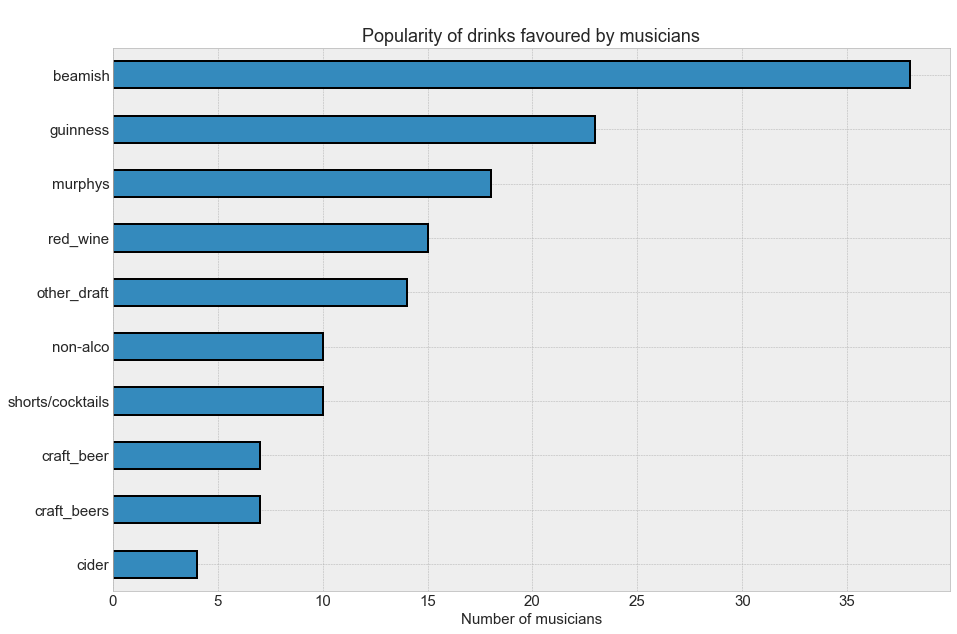

In [69]:
# set size and style
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('bmh')

# set title and x label
plt.title("\nPopularity of drinks favoured by musicians", size=18)
plt.xlabel("Number of musicians", size=15)

# create the plot
df['drink_of_choice'].value_counts().sort_values().plot(kind='barh', fontsize=15, edgecolor='k', linewidth=2);

We save the final version to file!

In [70]:
# save final csv file
df.to_csv('data/the_session_final.csv')

<br>

---
### The final dataset! 
---

In [71]:
# have a look
df.head(20)

,instrument,genre,ability,age_group,paid,gender,repertoire,drink_of_choice
musician,,,,,,,,
0,banjo,bluegrass,legend,old-head,yes,male,329,red_wine
1,fiddle,old-time,decent,whizz_kid,no,male,110,craft_beers
2,guitar,bluegrass,decent,grown-up,yes,female,112,guinness
3,bass,old-time,decent,whizz_kid,no,male,116,cider
4,bass,bluegrass,legend,whizz_kid,yes,male,102,guinness
5,dobro,bluegrass,decent,old-head,yes,female,313,craft_beers
6,guitar,blues,decent,whizz_kid,yes,male,102,craft_beer
7,guitar,bluegrass,decent,old-head,no,male,324,shorts/cocktails
8,mandolin,old-time,decent,grown-up,no,male,93,red_wine


<br>

This is just the first 20 rows of the dataframe but it looks fairly accurate to me! It would be interesting to undertake an actual study and record the same information over a month and see how close I got. In the meantime it has provided a bit of fun to whoever I have shown it to! 😁  
A full version of the final dataset can be viewed in the data folder - `data/the_session_final.csv`.

<br>

___
### References
___

[Different ways to create Pandas Dataframe - www.geeksforgeeks.org](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/)

[How to Add a Numpy Array to a Pandas DataFrame - www.statology.org](https://www.statology.org/add-numpy-array-to-pandas-dataframe/)

[How to generate a random normal distribution of integers - www.py4u.net](https://www.py4u.net/discuss/18951)

[Seaborn Bar Plot - stackabuse.com](https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/)

[Plotting with categorical data - seaborn.pydata.org](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot)

[numpy: most efficient frequency counts for unique values in an array - stackoverflow.com](https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array)

[Add a Column to a Pandas DataFrame Based on an If-Else Condition - www.dataquest.io](https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/)

[Insert a new column in pandas with random string values - stackoverflow.com](https://stackoverflow.com/questions/65982695/insert-a-new-column-in-pandas-with-random-string-values)

[pandas.Series.to_numpy - pandas.pydata.org](https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html)

[Python Random choices() Method - www.w3schools.com](https://www.w3schools.com/python/ref_random_choices.asp)

[How to convert a list into a pandas DataFrame in Python - www.kite.com](https://www.kite.com/python/answers/how-to-convert-a-list-into-a-pandas-dataframe-in-python)

[5 ways to apply an IF condition in Pandas DataFrame - datatofish.com](https://datatofish.com/if-condition-in-pandas-dataframe/)

[How can I randomly select an item from a list? - stackoverflow.com](https://stackoverflow.com/questions/306400/how-can-i-randomly-select-an-item-from-a-list)

[How to count the NaN values in a column in pandas DataFrame - stackoverflow.com](https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe)

[Complete list of github markdown emoji markup - gist.github.com](https://gist.github.com/rxaviers/7360908)

[How to Create Pie Chart from Pandas DataFrame - www.statology.org](https://www.statology.org/pandas-pie-chart/)

[Centering Text in IPython notebook markdown/heading cells? - stackoverflow.com](https://stackoverflow.com/questions/18575012/centering-text-in-ipython-notebook-markdown-heading-cells)

[Remove elements from numpy array smaller than 1 - stackoverflow.com](https://stackoverflow.com/questions/55806118/remove-elements-from-numpy-array-smaller-than-1)

<br>

---
## THE END
---